In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import altair as alt
import time

# Set Streamlit to wide mode
st.set_page_config(layout="wide")

# Sample data for the line chart with multiple series
def generate_data():
    return pd.DataFrame({
        'x': np.arange(1, 101),
        'Series A': np.random.randn(100).cumsum(),
        'Series B': np.random.randn(100).cumsum()
    }).melt('x', var_name='series', value_name='value')

# Initialize session state
if 'log' not in st.session_state:
    st.session_state['log'] = ''

if 'selected_option' not in st.session_state:
    st.session_state['selected_option'] = 'Option 1'

if 'update_chart' not in st.session_state:
    st.session_state['update_chart'] = False

if 'chart_data' not in st.session_state:
    st.session_state['chart_data'] = pd.DataFrame(columns=['x', 'series', 'value'])

if 'chart_visible' not in st.session_state:
    st.session_state['chart_visible'] = False

# Function to update log
def update_log(message):
    st.session_state['log'] += message + '\n'

# Callback functions
def option_callback():
    selected_option = st.session_state.selected_option
    if selected_option is not None:
        st.session_state['chart_visible'] = True
        update_log('Selected Option 1: Showing data')

    st.session_state['update_chart'] = False  # Stop chart updates when a new option is selected

def button1_callback():
    if st.session_state['selected_option'] is not None:
        st.session_state['chart_data'] = generate_data()
        st.session_state['chart_visible'] = True
        update_log('Button 1 clicked: Showing data')

    st.session_state['update_chart'] = False

def button2_callback():
    st.session_state['update_chart'] = not st.session_state['update_chart']  # Toggle chart updates
    if st.session_state['update_chart']:
        update_log('Button 2 clicked: Starting updates')
    else:
        update_log('Button 2 clicked: Stopping updates')

# Create a list of options
options = [f'Option {i}' for i in range(1, 101)]

# Create two columns with custom width ratios
col1, col2 = st.columns([1, 2])

# Column 1
with col1:
    # Selectbox with a callback
    st.selectbox(
        'Select an option:',
        options,
        index=options.index(st.session_state.selected_option),
        key='selected_option',
        on_change=option_callback
    )
    
    # Create a row for buttons
    button_col1, button_col2 = st.columns(2)
    with button_col1:
        st.button('Button 1', on_click=button1_callback)
    with button_col2:
        st.button('Button 2', on_click=button2_callback)
    
    # Display log messages in a text area
    st.text_area('Log', st.session_state['log'], height=200)

# Column 2
with col2:
    if st.session_state['chart_visible']:
        # Create an Altair line chart
        line_chart = alt.Chart(st.session_state['chart_data']).mark_line().encode(
            x='x',
            y='value',
            color='series',  # This will create the legend
            tooltip=['x', 'value', 'series']  # Adding tooltip for interactive display
        ).properties(
            title='Line Chart with Legend'
        )

        st.altair_chart(line_chart, use_container_width=True)

# Automatic chart updates every 100ms if update_chart is True
if st.session_state['update_chart']:
    time.sleep(0.1)
    st.session_state['chart_data'] = generate_data()
    st.experimental_rerun()


2024-07-08 15:27:25.926 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2024-07-08 15:27:26.043 
  command:

    streamlit run /home/tien/.local/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import altair as alt
import time

# Set Streamlit to wide mode
st.set_page_config(layout="wide")

# Sample data generation for the line chart and scatter chart with different x-values
def generate_data():
    return {
        'Series A': pd.DataFrame({
            'x_A': np.arange(1, 101),  # X-values for Series A
            'value_A': np.random.randn(100).cumsum()
        }),
        'Series B': pd.DataFrame({
            'x_B': np.arange(1, 101, 2),  # X-values for Series B
            'value_B': np.random.randn(50).cumsum()
        })
    }

# Initialize session state
if 'log' not in st.session_state:
    st.session_state['log'] = ''

if 'selected_option' not in st.session_state:
    st.session_state['selected_option'] = 'Option 1'

if 'update_chart' not in st.session_state:
    st.session_state['update_chart'] = False

if 'chart_data' not in st.session_state:
    st.session_state['chart_data'] = generate_data()

if 'chart_visible' not in st.session_state:
    st.session_state['chart_visible'] = False

# Function to update log
def update_log(message):
    st.session_state['log'] += message + '\n'

# Callback functions
def option_callback():
    selected_option = st.session_state.selected_option
    if selected_option is not None:
        st.session_state['chart_visible'] = True
        update_log('Selected Option 1: Showing data')

    st.session_state['update_chart'] = False  # Stop chart updates when a new option is selected

def button1_callback():
    if st.session_state['selected_option'] is not None:
        st.session_state['chart_data'] = generate_data()
        st.session_state['chart_visible'] = True
        update_log('Button 1 clicked: Showing data')

    st.session_state['update_chart'] = False

def button2_callback():
    st.session_state['update_chart'] = not st.session_state['update_chart']  # Toggle chart updates
    if st.session_state['update_chart']:
        update_log('Button 2 clicked: Starting updates')
    else:
        update_log('Button 2 clicked: Stopping updates')

# Create a list of options
options = [f'Option {i}' for i in range(1, 101)]

# Create two columns with custom width ratios
col1, col2 = st.columns([1, 2])

# Column 1
with col1:
    # Selectbox with a callback
    st.selectbox(
        'Select an option:',
        options,
        index=options.index(st.session_state.selected_option),
        key='selected_option',
        on_change=option_callback
    )
    
    # Create a row for buttons
    button_col1, button_col2 = st.columns(2)
    with button_col1:
        st.button('Button 1', on_click=button1_callback)
    with button_col2:
        st.button('Button 2', on_click=button2_callback)
    
    # Display log messages in a text area
    st.text_area('Log', st.session_state['log'], height=200)

# Column 2
with col2:
    if st.session_state['chart_visible']:
        # Get the generated data
        data = st.session_state['chart_data']
        data_series_a = data['Series A']
        data_series_b = data['Series B']

        # Create an Altair line chart for Series A
        line_chart = alt.Chart(data_series_a).mark_line().encode(
            x='x_A',
            y='value_A',
            color=alt.value('blue'),  # Set color for Series A
            tooltip=['x_A', 'value_A']  # Adding tooltip for interactive display
        ).properties(
            title='Series A Line Chart and Series B Scatter Chart'
        )

        # Create an Altair scatter chart for Series B
        scatter_chart = alt.Chart(data_series_b).mark_point().encode(
            x='x_B',
            y='value_B',
            color=alt.value('red'),  # Set color for Series B
            tooltip=['x_B', 'value_B']  # Adding tooltip for interactive display
        )

        # Combine both charts
        combined_chart = alt.layer(line_chart, scatter_chart).resolve_scale(
            y='independent'
        )

        st.altair_chart(combined_chart, use_container_width=True)

# Automatic chart updates every 100ms if update_chart is True
if st.session_state['update_chart']:
    print(st.session_state.selected_option)
    time.sleep(0.1)
    st.session_state['chart_data'] = generate_data()
    st.experimental_rerun()


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import altair as alt
import time

# Set Streamlit to wide mode
st.set_page_config(layout="wide")

# Sample data generation for the line chart and scatter chart with different x-values
def generate_data():
    return {
        'Series A': pd.DataFrame({
            'x_A': np.arange(1, 101),  # X-values for Series A
            'value_A': np.random.randn(100).cumsum()
        }),
        'Series B': pd.DataFrame({
            'x_B': np.arange(1, 101, 2),  # X-values for Series B
            'value_B': np.random.randn(50).cumsum()
        })
    }

# Initialize session state
if 'log' not in st.session_state:
    st.session_state['log'] = ''

if 'selected_option' not in st.session_state:
    st.session_state['selected_option'] = 'Option 1'

if 'update_chart' not in st.session_state:
    st.session_state['update_chart'] = False

if 'chart_data' not in st.session_state:
    st.session_state['chart_data'] = generate_data()

if 'chart_visible' not in st.session_state:
    st.session_state['chart_visible'] = False

# Function to update log
def update_log(message):
    st.session_state['log'] += message + '\n'

# Callback functions
def option_callback():
    selected_option = st.session_state.selected_option
    if selected_option is not None:
        st.session_state['chart_visible'] = True
        update_log('Selected Option 1: Showing data')

    st.session_state['update_chart'] = False  # Stop chart updates when a new option is selected

def button1_callback():
    if st.session_state['selected_option'] is not None:
        st.session_state['chart_data'] = generate_data()
        st.session_state['chart_visible'] = True
        update_log('Button 1 clicked: Showing data')

    st.session_state['update_chart'] = False

def button2_callback():
    st.session_state['update_chart'] = not st.session_state['update_chart']  # Toggle chart updates
    if st.session_state['update_chart']:
        update_log('Button 2 clicked: Starting updates')
    else:
        update_log('Button 2 clicked: Stopping updates')

# Create a list of options
options = [f'Option {i}' for i in range(1, 101)]

# Create two columns with custom width ratios
col1, col2 = st.columns([1, 2])

# Column 1
with col1:
    # Selectbox with a callback
    st.selectbox(
        'Select an option:',
        options,
        index=options.index(st.session_state.selected_option),
        key='selected_option',
        on_change=option_callback
    )
    
    # Create a row for buttons
    button_col1, button_col2 = st.columns(2)
    with button_col1:
        st.button('Button 1', on_click=button1_callback)
    with button_col2:
        st.button('Button 2', on_click=button2_callback)
    
    # Display log messages in a text area
    st.text_area('Log', st.session_state['log'], height=200)

# Column 2
with col2:
    if st.session_state['chart_visible']:
        # Get the generated data
        data = st.session_state['chart_data']
        data_series_a = data['Series A']
        data_series_b = data['Series B']

        # Create an Altair line chart for Series A
        line_chart = alt.Chart(data_series_a).mark_line().encode(
            x='x_A',
            y='value_A',
            color=alt.value('blue'),  # Set color for Series A
            tooltip=['x_A', 'value_A']  # Adding tooltip for interactive display
        ).properties(
            title='Series A Line Chart and Series B Scatter Chart'
        )

        # Create an Altair scatter chart for Series B
        scatter_chart = alt.Chart(data_series_b).mark_point().encode(
            x='x_B',
            y='value_B',
            color=alt.value('red'),  # Set color for Series B
            tooltip=['x_B', 'value_B']  # Adding tooltip for interactive display
        )

        # Combine both charts
        combined_chart = alt.layer(line_chart, scatter_chart).resolve_scale(
            y='independent'
        )

        st.altair_chart(combined_chart, use_container_width=True)

# Automatic chart updates every 100ms if update_chart is True
if st.session_state['update_chart']:
    print(st.session_state.selected_option)
    time.sleep(0.1)
    st.session_state['chart_data'] = generate_data()
    st.experimental_rerun()


In [1]:
from preprocessing import preprocess_data
import tensorflow as tf
import grpc
import numpy as np
from tensorflow_serving.apis import predict_pb2
from tensorflow_serving.apis import prediction_service_pb2_grpc
import matplotlib.pyplot as plt
import wfdb
import time
# Enable GPU
physical_devices = tf.config.list_physical_devices('GPU')

2024-07-12 10:23:24.510015: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-12 10:23:25.245634: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-07-12 10:23:26.219882: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-12 10:23:26.251773: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [2]:
# function for load data
def load_ecg(file):
    record = wfdb.rdrecord(file)
    annotation = wfdb.rdann(file, 'atr')
    p_signal = record.p_signal
    atr_sample = annotation.sample
    return p_signal, atr_sample

In [3]:
class QRSDetector():
    def __init__(self, data):
        self.channel = grpc.insecure_channel("172.17.0.2:9000")
        self.stub = prediction_service_pb2_grpc.PredictionServiceStub(self.channel)
        self.request = predict_pb2.PredictRequest()
        self.request.model_spec.name = 'qrs'
        self.request.model_spec.signature_name = 'channels'
        self.data = data
        
    def detect_qrs(self):
        tensor_proto = tf.make_tensor_proto(self.data, dtype=np.float32, shape=self.data.shape)
        self.request.inputs['input'].CopyFrom(tensor_proto)
        try:
            result = self.stub.Predict(self.request, 30.0)
            return tf.make_ndarray(result.outputs['prediction'])
        except Exception as e:
            print(e)
            return None

In [14]:
# Preprocess data
from define import *
MITDB_DIR = '/home/tien/Documents/ITR/mit-bih-arrhythmia-database-1.0.0/'
test_data, _ = load_ecg(MITDB_DIR + "100")

step = 1024-145
pred0 = np.empty((0, 2))
pred1 = np.empty((0, 2))
for i in range(0, len(test_data)-step, step):
    detector = QRSDetector(preprocess_data(test_data[i:i+1024, 0]))
    detector1 = QRSDetector(preprocess_data(test_data[i:i+1024,1]))

    prediction = np.rint(detector.detect_qrs())
    prediction1 = np.rint(detector1.detect_qrs())

    pred0 = np.concatenate((pred0, prediction), axis = 0)
    pred1 = np.concatenate((pred1, prediction1), axis = 0)

np.savetxt('pred0.txt', pred0, fmt='%d\t')
np.savetxt('pred1.txt', pred1, fmt='%d\t')

In [15]:
pred0.shape

(649581, 2)

In [8]:
len(test_data)

650000

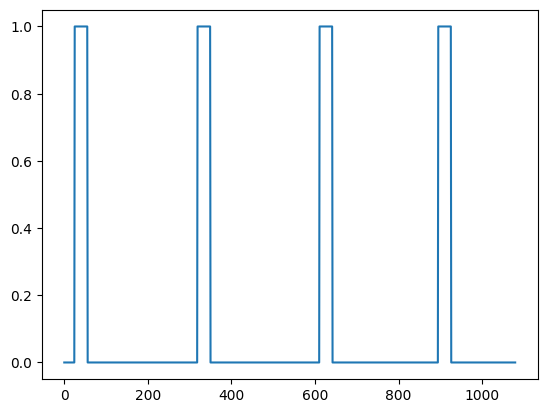

In [17]:
plt.plot(np.argmax(pred0[:360*3], axis = 1))

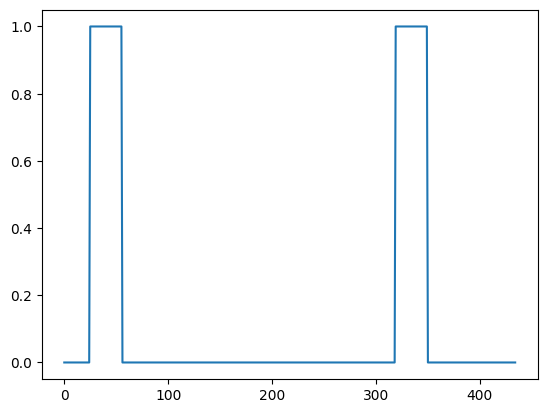

In [11]:
plt.plot(a)

In [31]:
from detectors import QRSDetector
import time
from preprocessing import preprocess_data
import numpy as np
import wfdb

# function for load data
def load_ecg(file):    
    # load the ecg
    record = wfdb.rdrecord(file)
    # load the annotation
    annotation = wfdb.rdann(file, 'atr')
    # extracting the signal
    p_signal = record.p_signal
    # extracting symbols and annotation index
    atr_sym = annotation.symbol
    atr_sample = annotation.sample
   
    return p_signal, atr_sym, atr_sample

# Preprocess data
MITDB_DIR = '/home/tien/Documents/ITR/mit-bih-arrhythmia-database-1.0.0/'
p_signal, atr_sym, atr_sample = load_ecg(MITDB_DIR + '100')

test_data = preprocess_data(p_signal[145:145*5,0])
predict = QRSDetector(test_data)
a = np.argmax(predict.detect_qrs(), axis=1)
# print('Time:', time.time()-start)
ones = np.where(a==1)
print(ones[0])

[168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198]


1
1


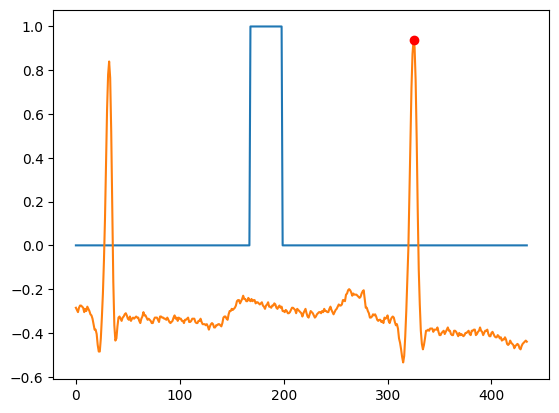

In [32]:
import matplotlib.pyplot as plt

plt.plot(a)
plt.plot(p_signal[45:145*3+45,0])

b = 0
x_B = [i-45 for i in atr_sample if 145 < i < 145*4 and i-45 > 0]
print(len(x_B))
value_B = p_signal[[i for i in atr_sample if 145 < i < 145*4 and i-45>0],0]
print(len(value_B))
plt.plot(x_B,value_B,'ro',label ='Normal')